In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = datasets.load_iris()
data_desc = raw_data.DESCR

#functions
def species_label(x):
	if x==0:
		return raw_data.target_names[0]
	if x==1:
		return raw_data.target_names[1]
	if x==2:
		return raw_data.target_names[2]

In [3]:
data = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
data['species'] = [species_label(x) for x in raw_data.target]
data['species_id'] = raw_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


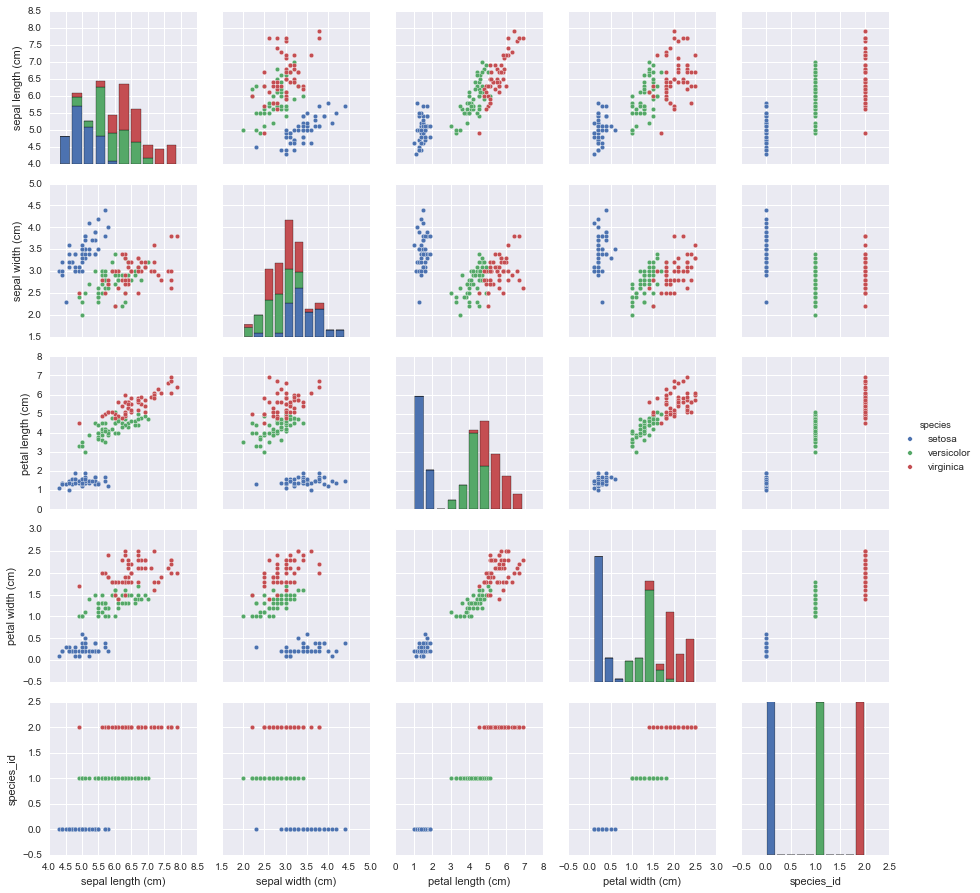

In [4]:
sns.pairplot(data, hue='species')
plt.show()

In [5]:
# Train and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

# Linear Model
lr_model = LinearRegression().fit(train_data[['sepal length (cm)',
                                            'sepal width (cm)',
                                            'petal length (cm)',
                                            'petal width (cm)']], train_data['species_id'])
lr_model.score(train_data[['sepal length (cm)',
                           'sepal width (cm)',
                           'petal length (cm)',
                           'petal width (cm)']], train_data['species_id'])
results = [np.round(x) for x in lr_model.predict(test_data[['sepal length (cm)',
                           'sepal width (cm)',
                           'petal length (cm)',
                           'petal width (cm)']]).tolist()]
[test_data.species_id.tolist()[i] - results[i] for i in range(30)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [6]:
# k fold builder
kfolder = KFold(len(data), n_folds=10, shuffle=True, random_state=123)

In [7]:
# cross validation
res = []
for train_idx, test_idx in kfolder:
    training = data.iloc[train_idx]
    testing = data.iloc[test_idx]
    score = lr_model.score(training[['sepal length (cm)',
                           'sepal width (cm)',
                           'petal length (cm)',
                           'petal width (cm)']], training['species_id'])
    res.append(score)
print(np.mean(res))

0.929776378857
